In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
%matplotlib inline
import os
import warnings as wr
wr.filterwarnings('ignore')

ERROR: Could not find a version that satisfies the requirement plotly.plotly (from versions: none)
ERROR: No matching distribution found for plotly.plotly


In [6]:
from google.colab import files
uploaded=files.upload()

Saving ProductsDB - JioMart.csv.zip to ProductsDB - JioMart.csv (1).zip


In [8]:
df=pd.read_csv('ProductsDB - JioMart.csv.zip')

In [9]:
print(df.head())

         title  discountedPrice  price  \
0   Besan 1 kg             74.0  160.0   
1  Besan 500 g             37.0   80.0   
2   Maida 1 kg             32.0   80.0   
3    Rawa 1 kg             38.0   86.0   
4  Maida 500 g             17.5   40.0   

                                            filename                 subType  \
0  https://www.jiomart.com/images/product/150x150...  Atta, Flours and Sooji   
1  https://www.jiomart.com/images/product/150x150...  Atta, Flours and Sooji   
2  https://www.jiomart.com/images/product/150x150...  Atta, Flours and Sooji   
3  https://www.jiomart.com/images/product/150x150...  Atta, Flours and Sooji   
4  https://www.jiomart.com/images/product/150x150...  Atta, Flours and Sooji   

      type  
0  Staples  
1  Staples  
2  Staples  
3  Staples  
4  Staples  


In [10]:
print(df.tail())

                                                  title  discountedPrice  \
5667           Everyuth Lemon Oil Clear Face Wash 100 g           111.60   
5668      Yardley London Morning Dew Perfumed Talc 50 g            51.15   
5669  Olay Natural White Instant Glowing Fairness wi...           157.17   
5670  Biotique Pearl White Flawless Fair Skin Facial...           232.50   
5671       BoroPlus Aloe Vera Gel with Vitamin E 150 ml            85.00   

      price                                           filename    subType  \
5667  120.0  https://www.jiomart.com/images/product/150x150...  Skin care   
5668   55.0  https://www.jiomart.com/images/product/150x150...  Skin care   
5669  169.0  https://www.jiomart.com/images/product/150x150...  Skin care   
5670  250.0  https://www.jiomart.com/images/product/150x150...  Skin care   
5671   95.0  https://www.jiomart.com/images/product/150x150...  Skin care   

               type  
5667  Personal care  
5668  Personal care  
5669  Personal

In [11]:
df.shape

(5672, 6)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5672 entries, 0 to 5671
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            5672 non-null   object 
 1   discountedPrice  5672 non-null   float64
 2   price            5672 non-null   float64
 3   filename         5672 non-null   object 
 4   subType          5672 non-null   object 
 5   type             5672 non-null   object 
dtypes: float64(2), object(4)
memory usage: 266.0+ KB


In [13]:
df.describe()

,discountedPrice,price
count,5672.000000,5672.000000
mean,173.948579,209.589298
std,348.412167,403.965959
min,4.650000,5.000000
25%,52.000000,64.000000
50%,99.000000,117.000000
75%,193.455000,225.000000
max,10799.000000,10799.000000


from matplotlib import pyplot as plt
_df_0['discountedPrice'].plot(kind='hist', bins=20, title='discountedPrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='discountedPrice', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['discountedPrice'].plot(kind='line', figsize=(8, 4), title='discountedPrice')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
df.columns.tolist()

['title', 'discountedPrice', 'price', 'filename', 'subType', 'type']

In [15]:
df.isnull().sum()

,0
title,0
discountedPrice,0
price,0
filename,0
subType,0
type,0


In [16]:
df.nunique()

,0
title,5652
discountedPrice,1144
price,497
filename,5672
subType,33
type,5


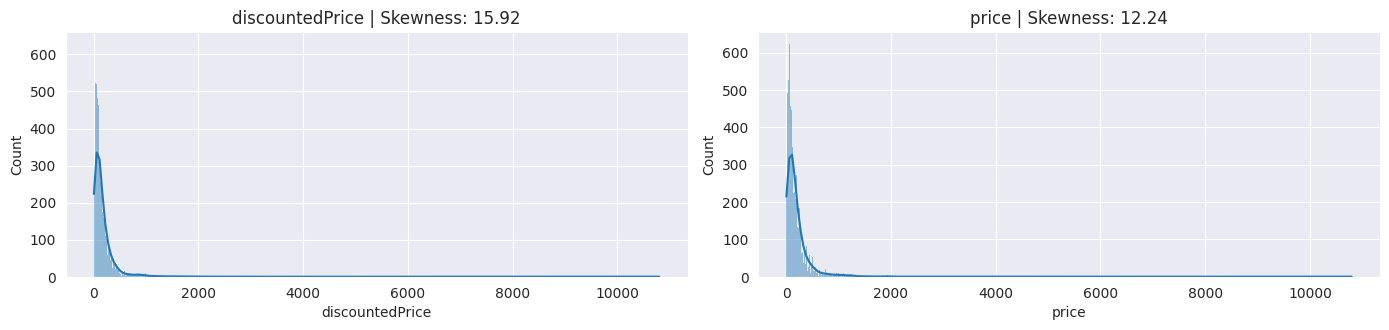

In [17]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

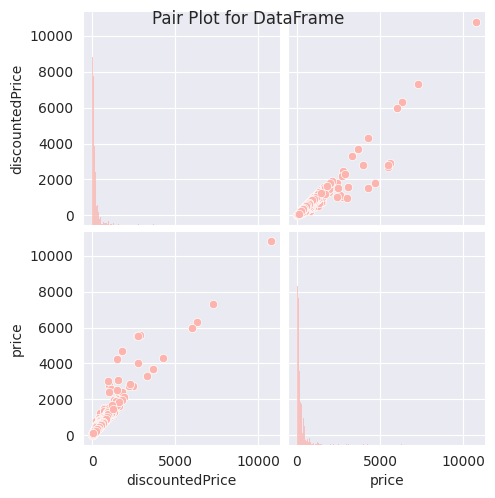

In [18]:
sns.set_palette("Pastel1")

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))

# Using Seaborn to create a pair plot with the specified color palette
sns.pairplot(df)

plt.suptitle('Pair Plot for DataFrame')
plt.show()

<Axes: xlabel='discountedPrice', ylabel='price'>

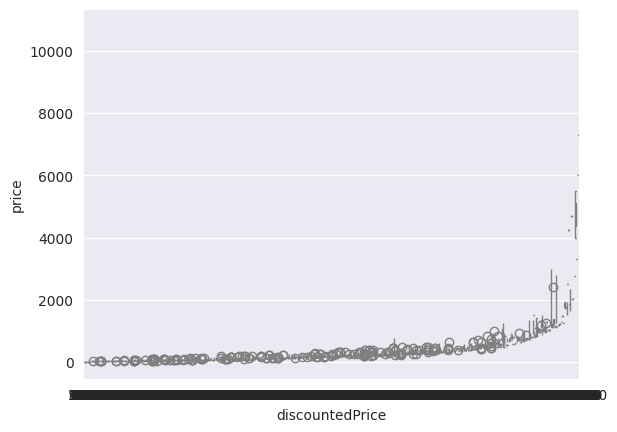

In [19]:
sns.boxplot(x="discountedPrice",y="price",data=df)

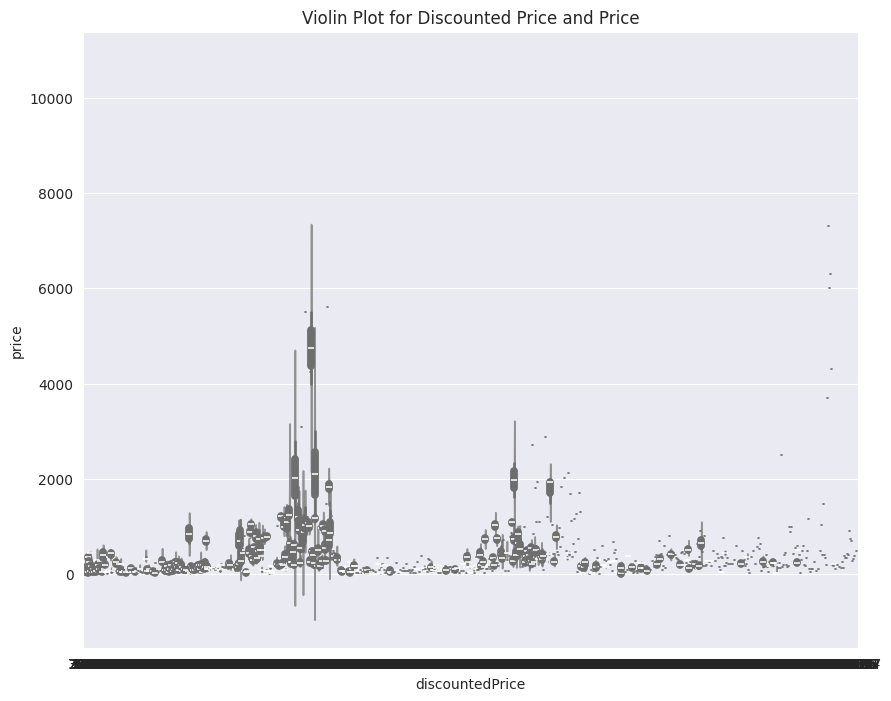

In [20]:
df['discountedPrice'] = df['discountedPrice'].astype(str)  # Convert to categorical

plt.figure(figsize=(10, 8))

# Using Seaborn to create a violin plot
sns.violinplot(x="discountedPrice", y="price", data=df, palette={'lightcoral'}, alpha=0.7)

plt.title('Violin Plot for Discounted Price and Price')
plt.xlabel('discountedPrice')
plt.ylabel('price')
plt.show()

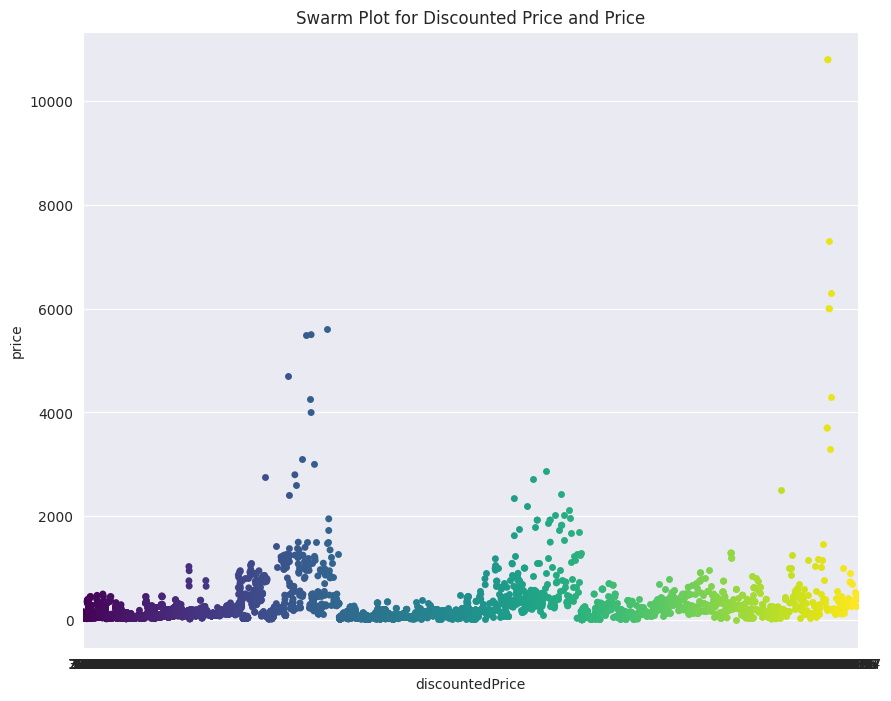

In [21]:
plt.figure(figsize=(10, 8))

# Using Seaborn to create a swarm plot
sns.swarmplot(x="discountedPrice", y="price", data=df, palette='viridis')

plt.title('Swarm Plot for Discounted Price and Price')
plt.xlabel('discountedPrice')
plt.ylabel('price')
plt.show()

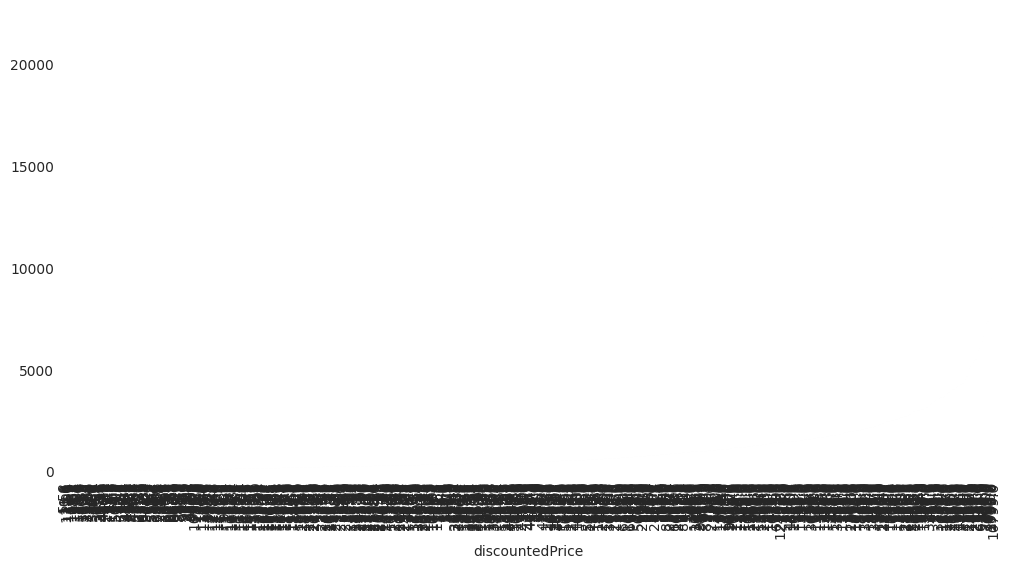

In [27]:
def plot(group,column,plot):
    ax=plt.figure(figsize=(12,6))
    df.groupby(group)[column].sum().sort_values().plot(kind=plot) # Pass 'plot' as a keyword argument

plot('discountedPrice','price','bar')

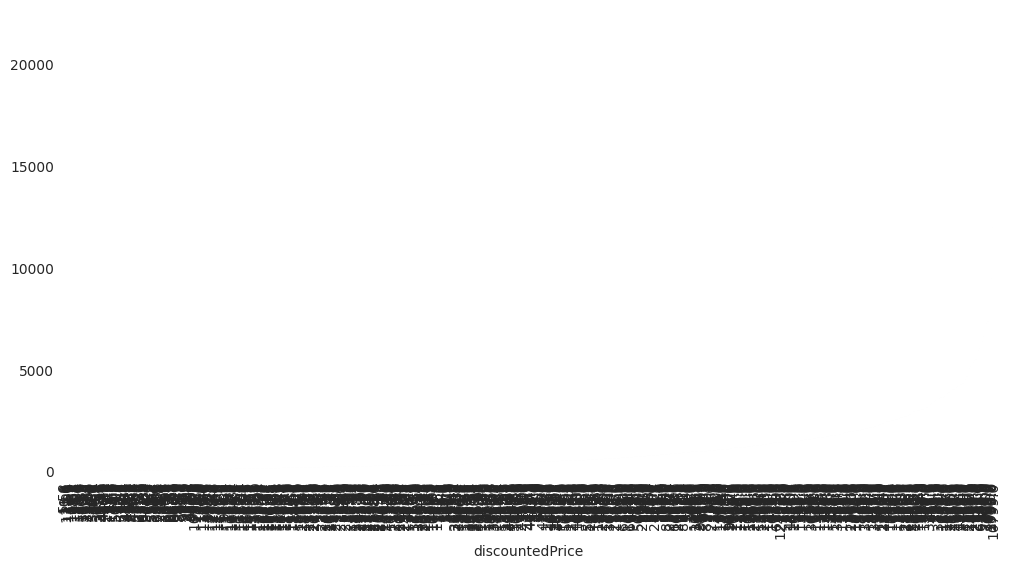

In [30]:
plot('discountedPrice','price','bar')